In [1]:
import pandas as pd # Data manipulation
import numpy as np # Numerical operations

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Handle warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv("companies.csv")  # import the dataset

In [3]:
company.head() # 1st 5 rows

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [4]:
company.describe()  # Satatistical information

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [5]:
company.columns # list of columns or variables

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information
    2. Remove noise or unreliable data (missing values and outliers)
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [6]:
company.drop(['region', 'city', 'state_code'], axis = 1, inplace = True) 

#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [7]:
company.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by','created_at', 'updated_at'], 
             axis = 1, inplace = True) 

#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [8]:
company.drop(['domain', 'homepage_url', 'twitter_username', 'logo_url','logo_width', 'logo_height', 'short_description', 
              'description', 'overview', 'tag_list', 'name','normalized_name', 'permalink', 'invested_companies'], 
             axis = 1, inplace = True) 

#### 1.d. Delete duplicate values if found any.

In [9]:
company.duplicated().sum() # count of duplicated values

87089

In [10]:
company.drop_duplicates(inplace=True) # delete duplicates

In [11]:
# check if any left
company.duplicated().sum()

0

#### 1.e. Delete those which has more than 98% of null values.

In [12]:
company.isna().sum() # number of null values per column

category_code           12230
status                      0
founded_at              26913
closed_at              106845
country_code            24870
first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
first_funding_at        77992
last_funding_at         77992
funding_rounds          77793
funding_total_usd       81602
first_milestone_at      53353
last_milestone_at       53353
milestones              53353
relationships           34403
lat                     28363
lng                     28363
ROI                    108738
dtype: int64

In [13]:
company.isna().any(axis = 1).sum() # total number of null values

109464

In [14]:
col_percent = pd.DataFrame(company.isnull().sum() * 100 / len(company)) # percentage of null values
col_percent

,0
category_code,11.172623
status,0.000000
founded_at,24.586165
closed_at,97.607433
country_code,22.719798
first_investment_at,97.947270
last_investment_at,97.947270
investment_rounds,97.943616
first_funding_at,71.248995
last_funding_at,71.248995


In [15]:
# drop columns with more then 98% null values
for col in col_percent.index:
    if col_percent.loc[col,0] > 98:
        company.drop(col, axis = 1, inplace=True)

#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [16]:
company = company.dropna( how='any',subset=['status', 'country_code', 'category_code','founded_at'])

In [17]:
company.isna().any(axis=1).sum() # total null values

63581

#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

<AxesSubplot:xlabel='funding_total_usd'>

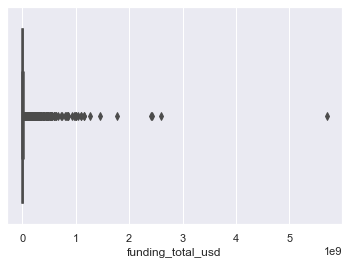

In [18]:
sns.boxplot(company['funding_total_usd'])

In [19]:
np.where(company['funding_total_usd'] > 1.0e9)

(array([ 1173,  1543,  2344, 17438, 25745, 29511, 44165, 49090, 53118,
        54984, 55189, 57302], dtype=int64),)

<AxesSubplot:xlabel='funding_rounds'>

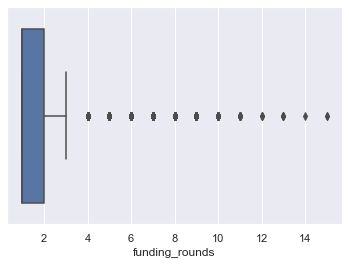

In [20]:
sns.boxplot(company['funding_rounds'])

In [21]:
np.where(company['funding_rounds'] >= 4)

(array([    7,    40,    77, ..., 63491, 63556, 63569], dtype=int64),)

we can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming 


#### 2.b.1. Find the IQR

In [22]:
# For funding_total_usd
Q1_ftu = company.funding_total_usd.quantile(0.25)
 
Q3_ftu = company.funding_total_usd.quantile(0.75)

IQR_ftu = Q3_ftu - Q1_ftu

# For funding_rounds
Q1_fr = company.funding_rounds.quantile(0.25)
 
Q3_fr = company.funding_rounds.quantile(0.75)

IQR_fr = Q3_fr - Q1_fr


#### 2.b.1. Find the Upper and Lower limit

In [23]:
# For funding_total_usd
upper_ftu = Q3_ftu+1.5*IQR_ftu
lower_ftu = Q1_ftu-1.5*IQR_ftu

# For funding_rounds
upper_fr = Q3_fr+1.5*IQR_fr
lower_fr = Q1_fr-1.5*IQR_fr

#### 2.b.1.  Find outliers

In [24]:
# For funding_total_usd
outlier_ftu = company.loc[(company.funding_total_usd < lower_ftu) | (company.funding_total_usd > upper_ftu)]

# For funding_rounds
outlier_fr = company.loc[(company.funding_rounds < lower_fr) | (company.funding_rounds > upper_fr)]

#### 2.b.1. Drop the outliers

In [25]:
# For funding_total_usd
company = company.loc[(company.funding_total_usd > lower_ftu) & (company.funding_total_usd < upper_ftu)]

# For funding_rounds
company = company.loc[(company.funding_rounds > lower_fr) & (company.funding_rounds < upper_fr)]
   

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [26]:
from datetime import datetime

In [27]:
date_columns = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at']

for col in date_columns:
    company[col] = pd.to_datetime(company[col]).dt.year

 #### 1.b. Generalize the categorical data i.e. category_code and  country_code 

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [30]:
OH_company = pd.DataFrame(OH_encoder.fit_transform(company[['category_code', 'country_code']]))

In [31]:
# One-hot encoding removed index; put it back
OH_company.index = company.index

In [32]:
# Remove categorical columns (will replace with one-hot encoding)
company = company.drop(['category_code', 'country_code'], axis=1)

In [33]:
# Add one-hot encoded columns to numerical features
company = pd.concat([company, OH_company], axis=1)

### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [34]:
for i in list(company.index):
    company.loc[company['status'] == 'operating', 'isClosed'] = 1
    company.loc[company['status'] == 'ipo', 'isClosed'] = 1
    company.loc[company['status'] == 'acquired', 'isClosed'] = 0
    company.loc[company['status'] == 'closed', 'isClosed'] = 0

In [35]:
company

,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,141,142,143,144,145,146,147,148,149,isClosed
13,acquired,2007,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,5000000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20,operating,2003,NaN,NaN,NaN,NaN,2011.0,2012.0,3.0,10125293.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
26,operating,2003,NaN,NaN,NaN,NaN,2003.0,2003.0,1.0,250000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32,operating,2010,NaN,NaN,NaN,NaN,2011.0,2011.0,1.0,100000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
36,operating,2006,NaN,NaN,NaN,NaN,2011.0,2012.0,2.0,11300000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,closed,2008,2012.0,NaN,NaN,NaN,2008.0,2008.0,1.0,130000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
196537,operating,2011,NaN,NaN,NaN,NaN,2011.0,2011.0,1.0,500000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196540,closed,2006,2012.0,NaN,NaN,NaN,2008.0,2009.0,2.0,1100000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
196549,operating,2007,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,750000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days, 
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

##### 2.b.i  Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
   - Where as if the value is 'acquired' or 'closed', let's put 0.

In [36]:
for i in list(company.index):
    company.loc[company['status'] == 'operating', 'closed_at'] = 2021
    company.loc[company['status'] == 'ipo', 'closed_at'] = 2021
    company.loc[company['status'] == 'acquired', 'closed_at'] = 0
    company.loc[company['status'] == 'closed', 'closed_at'] = 0

##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [37]:
company['active_days'] = abs((company.closed_at - company.founded_at) * 365)
company

,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,142,143,144,145,146,147,148,149,isClosed,active_days
13,acquired,2007,0.0,NaN,NaN,NaN,2008.0,2008.0,1.0,5000000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,732555.0
20,operating,2003,2021.0,NaN,NaN,NaN,2011.0,2012.0,3.0,10125293.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6570.0
26,operating,2003,2021.0,NaN,NaN,NaN,2003.0,2003.0,1.0,250000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6570.0
32,operating,2010,2021.0,NaN,NaN,NaN,2011.0,2011.0,1.0,100000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4015.0
36,operating,2006,2021.0,NaN,NaN,NaN,2011.0,2012.0,2.0,11300000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196526,closed,2008,0.0,NaN,NaN,NaN,2008.0,2008.0,1.0,130000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,732920.0
196537,operating,2011,2021.0,NaN,NaN,NaN,2011.0,2011.0,1.0,500000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3650.0
196540,closed,2006,0.0,NaN,NaN,NaN,2008.0,2009.0,2.0,1100000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,732190.0
196549,operating,2007,2021.0,NaN,NaN,NaN,2008.0,2008.0,1.0,750000.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5110.0


#### 2.b.iii. Then, delete the closed_at column.

In [38]:
company.drop('closed_at', axis = 1, inplace = True)

### Delete the columns with Null values

In [39]:
company.drop(['first_investment_at', 'last_investment_at', 'investment_rounds'], axis = 1, inplace = True)

### Remove the null vaues with the mean value in 'Numerical Data'

In [40]:
company['funding_total_usd'] = company['funding_total_usd'].fillna(company.funding_total_usd.mean())

company['funding_rounds'] = company['funding_rounds'].fillna(company.funding_rounds.mean())

company['milestones'] = company['milestones'].fillna(company.milestones.mean())

company['relationships'] = company['relationships'].fillna(company.relationships.mean())

In [41]:
company.isna().sum().sum() # count of null values

14658

In [42]:
company.dropna(inplace=True) # drop null values

In [43]:
# First let's check how much of rows has nan values and drop them.
company.isna().sum().sum()

0

In [44]:
# Save cleaned Data.
company.index = range(0,len(company))
company.to_csv('companies_new.csv')

In [45]:
company

,status,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,142,143,144,145,146,147,148,149,isClosed,active_days
0,acquired,2007,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,732555.0
1,operating,2003,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6570.0
2,operating,2003,2003.0,2003.0,1.0,250000.0,2007.0,2007.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6570.0
3,operating,2004,2011.0,2011.0,1.0,1500000.0,2010.0,2010.0,1.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6205.0
4,operating,2006,2007.0,2007.0,1.0,2500000.0,2010.0,2012.0,2.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9803,closed,2008,2008.0,2008.0,1.0,130000.0,2008.0,2009.0,2.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,732920.0
9804,operating,2011,2011.0,2011.0,1.0,500000.0,2011.0,2011.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3650.0
9805,closed,2006,2008.0,2009.0,2.0,1100000.0,2005.0,2008.0,2.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,732190.0
9806,operating,2007,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,14.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5110.0
